# Nivelatorio II: Estadística para la Ciencia de Datos

## Solución sugerida actividad en casa #2

In [1]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import randint ## distribución uniforme discreta
from scipy.stats import binom ## distribución binomial
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import norm ## distribución normal

1. Se calcula que  0.5 % de quienes se comunican al departamento de servicio al cliente, escuchará un tono de línea ocupada. ¿Cuál es la probabilidad de que de las 1200 personas que se comunicaron hoy, por lo menos 5 hayan escuchado un tono de línea ocupada? ¿Cuál es la probabilidad de que más de 10 personas hayan escuchado el tono de línea ocupada? Construir una tabla que contenga la probabilidad para x=0,1,2,3,4,5,6,7,8,9,10. Construir una gráfica de barras.

In [13]:
# Información
pi=0.005
n=1200

# Al menos 5 hayan escuchado tono de línea ocupado, es decir P(x>=5):
print(f'La probabilidad de que al menos 5 personas hayan escuchado el tono de línea ocupado es de {round(1 - binom.cdf(k=4,n=n,p=pi),4)*100} %')

La probabilidad de que al menos 5 personas hayan escuchado el tono de línea ocupado es de 71.56 %


In [14]:
# Más de 10 hayan escuchado tono de línea ocupado, es decir P(x>10):
print(f'La probabilidad de que más de 10 personas hayan escuchado el tono de línea ocupado es de {round(1 - binom.cdf(k=10,n=n,p=pi),4)*100} %')

La probabilidad de que más de 10 personas hayan escuchado el tono de línea ocupado es de 4.22 %


In [17]:
# Tabla probabilidades
## Calculemos la probabilidad asociada a cada posible resultado:
df = pd.DataFrame(data={'Resultado':range(0,11),
                        'Probabilidad':binom.pmf(k=range(0,11),n=n,p=pi)})
df

,Resultado,Probabilidad
0,0,0.002442
1,1,0.014724
2,2,0.044357
3,3,0.089011
4,4,0.133852
5,5,0.160891
6,6,0.161026
7,7,0.138022
8,8,0.103430
9,9,0.068838


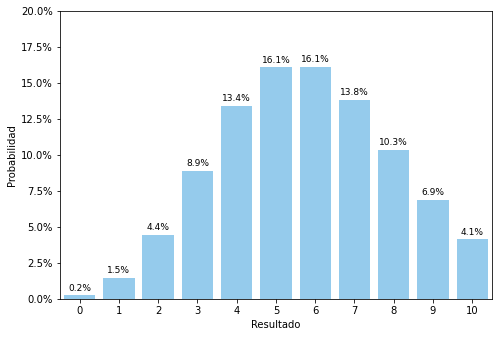

In [19]:
## Construyo la gráfica de la distribución:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3, size=9)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 20))
plt.show() 

In [20]:
## Recordemos la media de la distribución n*pi:
n*pi

6.0

2. Se ha encontrado que, en promedio, en 5 días al mes nos enfrentamos a problemas de liquidez. ¿Cuál es la probabilidad de que en el próximo mes ocurran problemas de liquidez en 12 días? ¿y entre 4 y 9 días? Construir una tabla que contenga la probabilidad para x=0,1,2,3,4,5,6,7,8,9,10. Construir una gráfica de barras.

In [25]:
## Información
media=5

# Problemas de liquidez en 12 días P(x=12):
print(f'La probabilidad de que ocurran problemas de liquidez en 12 días es de {round(poisson.pmf(k=12,mu=5),6)*100} %')

La probabilidad de que ocurran problemas de liquidez en 12 días es de 0.3434 %


In [47]:
# Problemas de liquidez entre 4 y 9 días P(4<=x<=9):
print(f'La probabilidad de que ocurran problemas de liquidez entre 4 y 9 días es de {round(poisson.cdf(k=9,mu=5) - poisson.cdf(k=3,mu=5),6)*100} %')

La probabilidad de que ocurran problemas de liquidez entre 4 y 9 días es de 70.3146 %


In [48]:
# Tabla probabilidades
## Calculemos la probabilidad asociada a cada posible resultado:
df = pd.DataFrame(data={'Resultado':range(0,11),
                        'Probabilidad':poisson.pmf(k=range(0,11),mu=media)})
df

,Resultado,Probabilidad
0,0,0.006738
1,1,0.033690
2,2,0.084224
3,3,0.140374
4,4,0.175467
5,5,0.175467
6,6,0.146223
7,7,0.104445
8,8,0.065278
9,9,0.036266


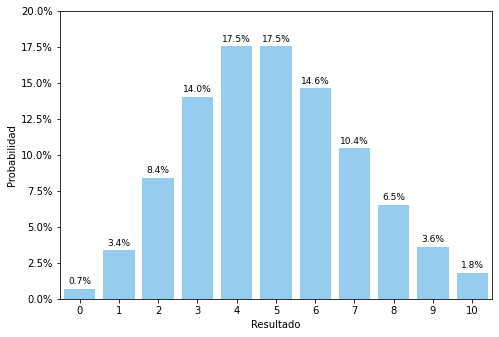

In [49]:
## Construyo la gráfica de la distribución:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3, size=9)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 20))
plt.show() 

3. En los resultados del último Saber 11 la media del puntaje global fue 260, con una desviación estándar de 45. Teniendo en cuenta que el Saber 11 es una prueba estandarizada, ¿cuál es la probabilidad de que un estudiante haya obtenido 200 o menos? ¿a partir de qué puntaje se encuentra el 10% de estudiantes con mayor puntaje? ¿cuáles son los valores de la regla empírica?

In [52]:
## Información:
media=260
desv=45

# probabilidad de obtener 200 o menos P(x<=200)
print(f'La probabilidad de obtenga un puntaje de 200 o menos es de {round(norm.cdf(x=200, loc=media, scale=desv)*100,2)} %')

La probabilidad de obtenga un puntaje de 200 o menos es de 9.12 %


In [54]:
# A partir de qué valor está el top 10% P(x<=X)=90%:
print(f'El valor a partir del cual se encuentra el top 10% de puntajes es {round(norm.ppf(q=0.9, loc=media, scale=desv),2)}')

El valor a partir del cual se encuentra el top 10% de puntajes es 317.67


In [58]:
# Valores de la reglá empírica:
print(f'El 68.2% de los datos están entre {round(media-desv,2)} y {round(media+desv,2)}')
print(f'El 95.4% de los datos están entre {round(media-2*desv,2)} y {round(media+2*desv,2)}')
print(f'El 99.7% de los datos están entre {round(media-3*desv,2)} y {round(media+3*desv,2)}')

El 68.2% de los datos están entre 215 y 305
El 95.4% de los datos están entre 170 y 350
El 99.7% de los datos están entre 125 y 395


4. El equipo de fútbol de la ciudad juega el 70% de sus partidos de noche y el 30% de día. Cuando juega de noche, gana el 50% de las veces, mientras que si juega de día gana el 90% de las veces. Hoy me levanté y vi que el equipo ayer ganó. ¿Cuál es la probabilidad de que le partido se haya jugado de noche?

In [59]:
## Información:
p_partidos_noche=0.7
p_partidos_dia=0.3
p_gana_noche=0.5
p_gana_dia=0.9
# el equipo ganó ayer

#Primero se calcula la probabilidad de ganar un partido
p_ganar=p_partidos_noche*p_gana_noche + p_partidos_dia*p_gana_dia
print(f'La probabilidad de ganar un partido es {round(p_ganar*100,2)}%')

La probabilidad de ganar un partido es 62.0%


In [60]:
# Ahora sí, aplicamos el Teorema de Bayes:
p_noche_ganar= (p_partidos_noche*p_gana_noche)/p_ganar
print(f'La probabilidad de que el partido se haya jugado de noche dado que el equipo ganó es de {round(p_noche_ganar*100,2)}%')

La probabilidad de que el partido se haya jugado de noche dado que el equipo ganó es de 56.45%


5. En los últimos 20 partidos el América ha anotado en promedio 1.2 goles de local, mientras que el Cali ha anotado en promedio 0.9 goles de visitante, en el mismo número de partidos. Suponiendo independencia en los goles que anota ambos equipos, ¿qué probabilidad tiene América de no anotar goles? ¿ y el Cali? ¿Qué probabilidad tiene el América de anotar 1 o 2 goles? ¿ y el Cali? Construir una gráfica de barras para cada equipo desde 0 a 5 goles. ¿Qué probabilidad hay de que el partido termine 0-0, 1-0, 1-1, 2-1, 1-2?

In [62]:
## Información:
prom_ame=1.2
prom_cal=0.9

# Probabilidad de que América no anote goles:
print(f'La probabilidad de que América no anote goles es {round((poisson.pmf(k=0,mu=prom_ame))*100,2)} %')

La probabilidad de que América no anote goles es 30.12 %


In [63]:
# Probabilidad de que Cali no anote goles:
print(f'La probabilidad de que Cali no anote goles es {round((poisson.pmf(k=0,mu=prom_cal))*100,2)} %')

La probabilidad de que Cali no anote goles es 40.66 %


In [64]:
# Probabilidad de que América anote 1 o 2 goles:
print(f'La probabilidad de que América anote 1 o 2 goles es {round((poisson.pmf(k=1,mu=prom_ame)+poisson.pmf(k=2,mu=prom_ame))*100,2)} %')

La probabilidad de que América anote 1 o 2 goles es 57.83 %


In [65]:
# Probabilidad de que Cali anote 1 o 2 goles:
print(f'La probabilidad de que Cali anote 1 o 2 goles es {round((poisson.pmf(k=1,mu=prom_cal)+poisson.pmf(k=2,mu=prom_cal))*100,2)} %')

La probabilidad de que Cali anote 1 o 2 goles es 53.06 %


In [66]:
# Tabla probabilidades
## Calculemos la probabilidad asociada a cada posible resultado:
df = pd.DataFrame(data={'Goles':range(0,6),
                        'Prob América':poisson.pmf(k=range(0,6),mu=prom_ame),
                        'Prob Cali':poisson.pmf(k=range(0,6),mu=prom_cal)})
df

,Goles,Prob América,Prob Cali
0,0,0.301194,0.406570
1,1,0.361433,0.365913
2,2,0.216860,0.164661
3,3,0.086744,0.049398
4,4,0.026023,0.011115
5,5,0.006246,0.002001


In [68]:
df2=pd.melt(df,id_vars='Goles')
df2

,Goles,variable,value
0,0,Prob América,0.301194
1,1,Prob América,0.361433
2,2,Prob América,0.216860
3,3,Prob América,0.086744
4,4,Prob América,0.026023
5,5,Prob América,0.006246
6,0,Prob Cali,0.406570
7,1,Prob Cali,0.365913
8,2,Prob Cali,0.164661
9,3,Prob Cali,0.049398


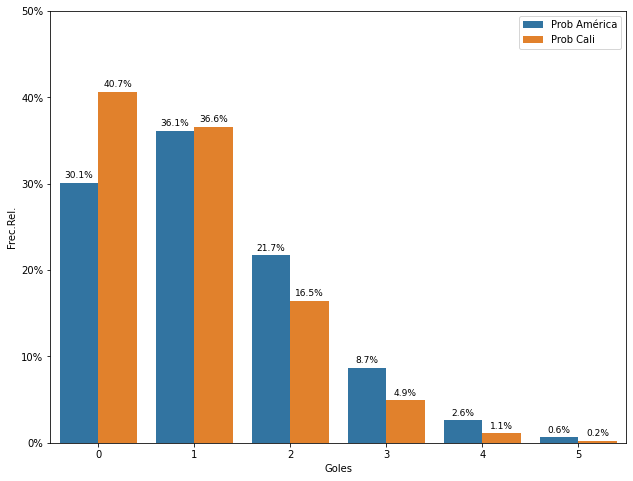

In [81]:
## Construyo la gráfica de la distribución:
df2=pd.melt(df,id_vars='Goles')

#Gráfica
fig_sns = plt.figure() 
fig_sns.set_size_inches(8, 6)
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=df2["Goles"],y=df2["value"]*100, hue=df2["variable"]) 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3, size=9)
ax.bar_label(ax.containers[1], label_type='edge',fmt='%.1f%%',padding=3, size=9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 50))
plt.ylabel('Frec.Rel.') 
plt.legend(title='', loc='upper right')
plt.show() 

In [85]:
#Teniendo en cuenta que hay independencia en los goles anotados, estamos ante un caso 
#en el que debemos utilizar la regla de la multiplicación para eventos independientes:
print(f' La probabilidad de que el partido termine 0-0 es: {round(100*poisson.pmf(k=0,mu=prom_ame)*poisson.pmf(k=0,mu=prom_cal),2)} %')
print(f' La probabilidad de que el partido termine 1-0 es: {round(100*poisson.pmf(k=1,mu=prom_ame)*poisson.pmf(k=0,mu=prom_cal),2)} %')
print(f' La probabilidad de que el partido termine 1-1 es: {round(100*poisson.pmf(k=1,mu=prom_ame)*poisson.pmf(k=1,mu=prom_cal),2)} %')
print(f' La probabilidad de que el partido termine 2-1 es: {round(100*poisson.pmf(k=2,mu=prom_ame)*poisson.pmf(k=1,mu=prom_cal),2)} %')
print(f' La probabilidad de que el partido termine 1-2 es: {round(100*poisson.pmf(k=1,mu=prom_ame)*poisson.pmf(k=2,mu=prom_cal),2)} %')

 La probabilidad de que el partido termine 0-0 es: 12.25 %
 La probabilidad de que el partido termine 1-0 es: 14.69 %
 La probabilidad de que el partido termine 1-1 es: 13.23 %
 La probabilidad de que el partido termine 2-1 es: 7.94 %
 La probabilidad de que el partido termine 1-2 es: 5.95 %
